In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [6]:
df = pd.read_excel('E:/BACK UP DATA C 2022/DOWNLOADS/PMMB BRI/Mamikos/mamikos_.xlsx')
df

,Title,lokasi,Kota,Gender,Fasilitas,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Jmlh Fasilitas,Sisakamar,Rating,Harga,Foto,ProbKota,ProbKec
0,Kost Apik Lia Tipe A Sawah Besar Jakarta Pusat,Sawah Besar,Jakarta Pusat,Campur,WiFi,Kasur,NaN,NaN,NaN,NaN,NaN,NaN,2,3,3.5,1008000,https://static.mamikos.com/uploads/cache/data/...,0.081724,0.056206
1,Kost Tulip Home Tipe A Sawah Besar Jakarta Pusat,Sawah Besar,Jakarta Pusat,Campur,K. Mandi Dalam,WiFi,AC,Kloset Duduk,Kasur,Akses 24 Jam,NaN,NaN,6,2,4.2,2800000,https://mamikos.com/general/img/pictures/place...,0.173038,0.120219
2,Kost Singgahsini Tanah Abang Tipe C Jakarta Pusat,Tanah Abang,Jakarta Pusat,Putri,K. Mandi Dalam,WiFi,AC,Kasur,Akses 24 Jam,NaN,NaN,NaN,5,1,4.3,1520000,https://static.mamikos.com/uploads/cache/data/...,0.173038,0.120219
3,Kost Singgahsini MnV Co-Living Tipe E Bendunga...,Tanah Abang,Jakarta Pusat,Campur,K. Mandi Dalam,WiFi,AC,Kloset Duduk,Kasur,Akses 24 Jam,NaN,NaN,6,1,4.3,2420000,https://static.mamikos.com/uploads/cache/data/...,0.173038,0.120219
4,Kost Apik Lia Tipe B Sawah Besar Jakarta Pusat,Sawah Besar,Jakarta Pusat,Campur,WiFi,Kasur,NaN,NaN,NaN,NaN,NaN,NaN,2,2,4.4,1170000,https://mamikos.com/general/img/pictures/place...,0.173038,0.120219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Kost Singgahsini Hadiah Residence Tipe A Grogo...,Grogol petamburan,Jakarta Barat,Putri,K. Mandi Dalam,WiFi,AC,Kloset Duduk,NaN,NaN,NaN,NaN,4,1,4.8,1670000,https://mamikos.com/general/img/pictures/place...,0.155613,0.143029
96,Kost Singgahsini Malira Tipe C Tomang Jakarta ...,Grogol Petamburan,Jakarta Barat,Putra,Kos Higienis,K. Mandi Dalam,WiFi,AC,Kloset Duduk,Kasur,Akses 24 Jam,NaN,7,1,4.8,2400000,https://mamikos.com/general/img/pictures/place...,0.299203,0.143029
97,Kost Apik Benz Grogol Jakarta Barat,Grogol petamburan,Jakarta Barat,Campur,WiFi,Kloset Duduk,Kasur,NaN,NaN,NaN,NaN,NaN,3,1,3.8,697000,https://static.mamikos.com/uploads/cache/data/...,0.112387,0.143029
98,Kost Apik BINUS Syahdan Tipe C Palmerah Jakart...,Palmerah,Jakarta Barat,Putri,WiFi,AC,Kloset Duduk,Kasur,Akses 24 Jam,NaN,NaN,NaN,5,1,4.7,1278000,https://static.mamikos.com/uploads/cache/data/...,0.112387,0.105971


In [8]:
dfdrop = df.drop(columns = ["Fasilitas","Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "ProbKota", "ProbKec"])
dfdrop.head(10)

,Title,lokasi,Kota,Gender,Jmlh Fasilitas,Sisakamar,Rating,Harga,Foto
0,Kost Apik Lia Tipe A Sawah Besar Jakarta Pusat,Sawah Besar,Jakarta Pusat,Campur,2,3,3.5,1008000,https://static.mamikos.com/uploads/cache/data/...
1,Kost Tulip Home Tipe A Sawah Besar Jakarta Pusat,Sawah Besar,Jakarta Pusat,Campur,6,2,4.2,2800000,https://mamikos.com/general/img/pictures/place...
2,Kost Singgahsini Tanah Abang Tipe C Jakarta Pusat,Tanah Abang,Jakarta Pusat,Putri,5,1,4.3,1520000,https://static.mamikos.com/uploads/cache/data/...
3,Kost Singgahsini MnV Co-Living Tipe E Bendunga...,Tanah Abang,Jakarta Pusat,Campur,6,1,4.3,2420000,https://static.mamikos.com/uploads/cache/data/...
4,Kost Apik Lia Tipe B Sawah Besar Jakarta Pusat,Sawah Besar,Jakarta Pusat,Campur,2,2,4.4,1170000,https://mamikos.com/general/img/pictures/place...
5,Kost Apik Tante Kebon Kacang 2 Tipe C Tanah Ab...,Tanah Abang,Jakarta Pusat,Putri,5,4,4.5,1720000,https://mamikos.com/general/img/pictures/place...
6,Kost Apik Lia Tipe C Sawah Besar Jakarta Pusat,Sawah Besar,Jakarta Pusat,Campur,4,1,4.6,1820000,https://static.mamikos.com/uploads/cache/data/...
7,Kost Singgahsini Elani Residence Tipe C Senen ...,Senen,Jakarta Pusat,Campur,5,1,4.7,2780000,https://static.mamikos.com/uploads/cache/data/...
8,Kost Apik Petojo 5 Roxy Tipe A Jakarta Pusat,Gambir,Jakarta Pusat,Campur,5,1,4.7,1638000,https://static.mamikos.com/uploads/cache/data/...
9,Kost Singgahsini MnV Co-Living Tipe A Bendunga...,Tanah Abang,Jakarta Pusat,Campur,6,2,4.8,3000000,https://mamikos.com/general/img/pictures/place...


In [9]:
dfdrop.shape

(100, 9)

In [10]:
dfdrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           100 non-null    object 
 1   lokasi          100 non-null    object 
 2   Kota            100 non-null    object 
 3   Gender          100 non-null    object 
 4   Jmlh Fasilitas  100 non-null    int64  
 5   Sisakamar       100 non-null    int64  
 6   Rating          100 non-null    float64
 7   Harga           100 non-null    int64  
 8   Foto            100 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.2+ KB


In [7]:
df['Harga'] = df['Harga'].astype(int)

In [12]:
new_df = df[["Jmlh Fasilitas", "Rating", "Harga"]]
new_df.describe().round()

,Jmlh Fasilitas,Rating,Harga
count,100.0,100.0,100.0
mean,5.0,4.0,1705678.0
std,2.0,1.0,748857.0
min,1.0,1.0,550000.0
25%,4.0,4.0,1080000.0
50%,5.0,5.0,1644000.0
75%,6.0,5.0,2327500.0
max,8.0,5.0,3620000.0


In [13]:
scaler = StandardScaler()
new_df_scaled = scaler.fit_transform(new_df)


In [14]:
new_df_scaled = pd.DataFrame(StandardScaler().fit_transform(new_df), columns=new_df.columns, index=new_df.index)
new_df_scaled

,Jmlh Fasilitas,Rating,Harga
0,-1.789456,-1.473611,-0.936351
1,0.739810,-0.423175,1.468685
2,0.107494,-0.273113,-0.249198
3,0.739810,-0.273113,0.958689
4,-1.789456,-0.123051,-0.718931
...,...,...,...
95,-0.524823,0.477198,-0.047883
96,1.372127,0.477198,0.931847
97,-1.157139,-1.023424,-1.353743
98,0.107494,0.327136,-0.573985


In [15]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [16]:
hopkins(new_df_scaled)

0.8760507133735588

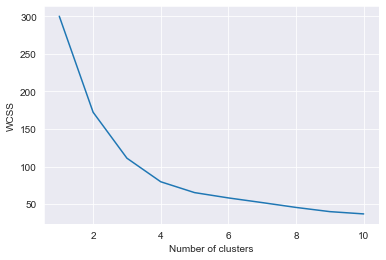

In [17]:
# elbow-curve/SSD
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(new_df_scaled) 
    wcss.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()


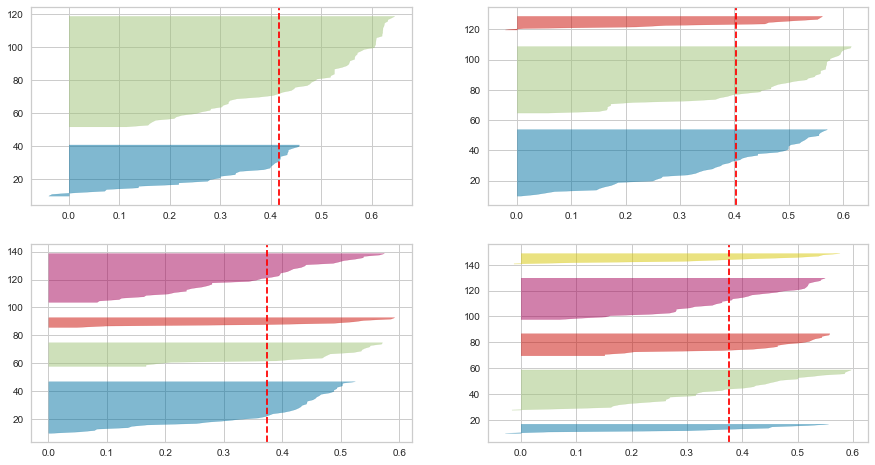

In [18]:
# silhouette analysis
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(new_df_scaled)

In [24]:
for num_clusters in [2, 3, 4, 5]:
    
    # intialise kmeans
    km = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, max_iter=100, random_state=42)
    km.fit(new_df_scaled)
    
    cluster_labels = km.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(new_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4164592238091583
For n_clusters=3, the silhouette score is 0.403506095811769
For n_clusters=4, the silhouette score is 0.37297174037447056
For n_clusters=5, the silhouette score is 0.375865149434649


In [60]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
labels = kmeans.fit_predict(new_df_scaled)
y = kmeans.labels_
y

array([1, 2, 0, 2, 3, 0, 0, 2, 0, 2, 2, 3, 2, 2, 0, 0, 2, 3, 2, 0, 1, 1,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 3, 3, 3, 1, 1, 1, 0,
       1, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 3,
       2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 2, 2, 0, 3, 2, 2, 3, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 0, 0])

In [ ]:
array([1, 2, 0, 2, 3, 0, 0, 2, 0, 2, 2, 3, 2, 2, 0, 0, 2, 3, 2, 0, 1, 1,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 3, 3, 3, 1, 1, 1, 0,
       1, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 3,
       2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 2, 2, 0, 3, 2, 2, 3, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 0, 0])

In [87]:
df_new = df[["Title", "lokasi", "Kota", "Jmlh Fasilitas", "Rating", "Harga", "ProbKota", "ProbKec"]]
df_new["cluster_id"] = kmeans.labels_

In [88]:
df_new.head(10)

,Title,lokasi,Kota,Jmlh Fasilitas,Rating,Harga,ProbKota,ProbKec,cluster_id
0,Kost Apik Lia Tipe A Sawah Besar Jakarta Pusat,Sawah Besar,Jakarta Pusat,2,3.50,1008000,0.08,0.06,1
1,Kost Tulip Home Tipe A Sawah Besar Jakarta Pusat,Sawah Besar,Jakarta Pusat,6,4.20,2800000,0.17,0.12,2
2,Kost Singgahsini Tanah Abang Tipe C Jakarta Pusat,Tanah Abang,Jakarta Pusat,5,4.30,1520000,0.17,0.12,0
3,Kost Singgahsini MnV Co-Living Tipe E Bendunga...,Tanah Abang,Jakarta Pusat,6,4.30,2420000,0.17,0.12,2
4,Kost Apik Lia Tipe B Sawah Besar Jakarta Pusat,Sawah Besar,Jakarta Pusat,2,4.40,1170000,0.17,0.12,3
5,Kost Apik Tante Kebon Kacang 2 Tipe C Tanah Ab...,Tanah Abang,Jakarta Pusat,5,4.50,1720000,0.17,0.12,0
6,Kost Apik Lia Tipe C Sawah Besar Jakarta Pusat,Sawah Besar,Jakarta Pusat,4,4.60,1820000,0.17,0.12,0
7,Kost Singgahsini Elani Residence Tipe C Senen ...,Senen,Jakarta Pusat,5,4.70,2780000,0.16,0.27,2
8,Kost Apik Petojo 5 Roxy Tipe A Jakarta Pusat,Gambir,Jakarta Pusat,5,4.70,1638000,0.30,0.12,0
9,Kost Singgahsini MnV Co-Living Tipe A Bendunga...,Tanah Abang,Jakarta Pusat,6,4.80,3000000,0.16,0.06,2


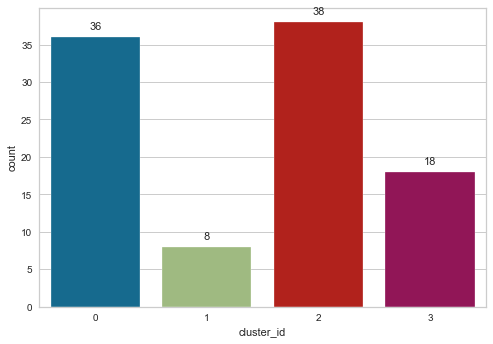

In [89]:
ax = sns.countplot(x=df_new['cluster_id']);
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() /2,rect.get_height()+1,rect.get_height(), horizontalalignment = 'center', fontsize = 11) 


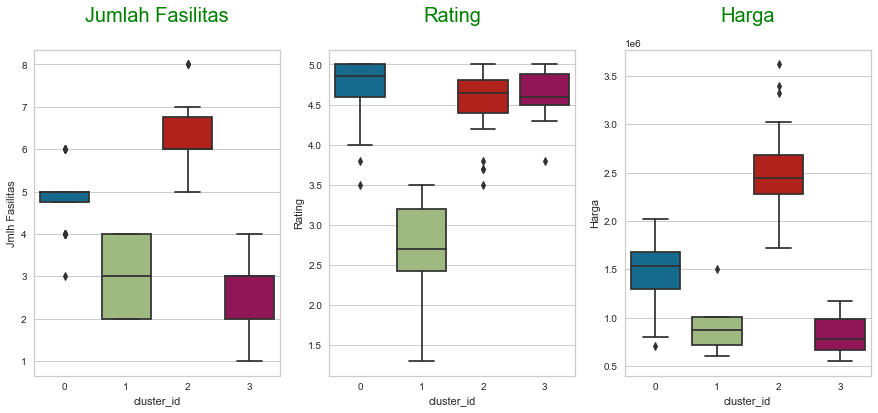

In [90]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(df_new["cluster_id"], new_df["Jmlh Fasilitas"])
plt.title("Jumlah Fasilitas\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,3,2)
sns.boxplot(df_new["cluster_id"], new_df["Rating"])
plt.title("Rating\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,3,3)
sns.boxplot(df_new["cluster_id"], new_df["Harga"])
plt.title("Harga\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

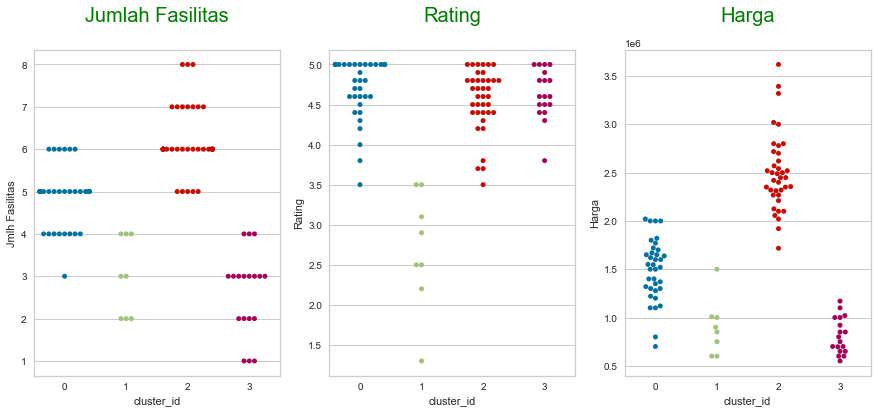

In [91]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.swarmplot(y = df_new['Jmlh Fasilitas'], x = df_new['cluster_id'])
plt.title("Jumlah Fasilitas\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,3,2)
sns.swarmplot(y = df_new['Rating'], x = df_new['cluster_id'])
plt.title("Rating\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,3,3)
sns.swarmplot(y = df_new['Harga'], x = df_new['cluster_id'])
plt.title("Harga\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

In [92]:
cluster_0 = df_new[(df_new["cluster_id"] == 0)]
cluster_0.sort_values(["Harga", "Rating","Jmlh Fasilitas", "lokasi", "Kota"], ascending = [False, False, False, False, False])

,Title,lokasi,Kota,Jmlh Fasilitas,Rating,Harga,ProbKota,ProbKec,cluster_id
27,Kost Singgahsini Kita Home Tipe A Pejaten Jaka...,Pasar Minggu,Jakarta Selatan,5,4.60,2020000,0.25,0.08,0
33,Kost Pejaten Indah Pancoran Jakarta Selatan,Pancoran,Jakarta Selatan,5,5.00,2000000,0.12,0.04,0
73,Kost Gading Kopyor Kelapa Gading Jakarta Utara,Kelapa Gading,Jakarta Utara,5,5.00,2000000,0.16,0.10,0
78,Kost Pelangi Indah Tipe A Kelapa Gading Jakart...,Kelapa Gading,Jakarta Utara,3,5.00,2000000,0.16,0.05,0
6,Kost Apik Lia Tipe C Sawah Besar Jakarta Pusat,Sawah Besar,Jakarta Pusat,4,4.60,1820000,0.17,0.12,0
71,Kost Kejora Tipe C Kelapa Gading Jakarta Utara,Kelapa Gading,Jakarta Utara,4,5.00,1800000,0.16,0.05,0
75,Kost Apik 3L Residence Tipe B Kelapa Gading Ja...,Kelapa Gading,Jakarta Utara,5,4.60,1770000,0.16,0.12,0
5,Kost Apik Tante Kebon Kacang 2 Tipe C Tanah Ab...,Tanah Abang,Jakarta Pusat,5,4.50,1720000,0.17,0.12,0
43,Kost Griya Wartawan Cipinang Muara Tipe B Jati...,Jatinegara,Jakarta Timur,5,3.50,1700000,0.30,0.12,0
95,Kost Singgahsini Hadiah Residence Tipe A Grogo...,Grogol petamburan,Jakarta Barat,4,4.80,1670000,0.16,0.14,0


In [94]:
len(cluster_0)
cluster_0.to_excel('cluster01.xlsx')

In [95]:
cluster_1 = df_new[(df_new["cluster_id"] == 1)]
cluster_1.sort_values(["Harga", "Rating","Jmlh Fasilitas", "lokasi", "Kota"], ascending = [False, False, False, False, False])

,Title,lokasi,Kota,Jmlh Fasilitas,Rating,Harga,ProbKota,ProbKec,cluster_id
60,Kost Star Tipe A Kelapa Gading Jakarta Utara,Kelapa Gading,Jakarta Utara,4,2.50,1500000,0.16,0.08,1
0,Kost Apik Lia Tipe A Sawah Besar Jakarta Pusat,Sawah Besar,Jakarta Pusat,2,3.50,1008000,0.08,0.06,1
20,Kost Pak Luthfi Tipe B Kebayoran Baru Jakarta ...,Kebayoran Baru,Jakarta Selatan,4,2.50,1000000,0.17,0.08,1
44,Kost Ibu Ekky Matraman Jakarta Timur,Matraman,Jakarta Timur,4,3.50,900000,0.30,0.08,1
42,Kost Bunda Ella Tipe A Pulo Gadung Jakarta Timur,Pulo Gadung,Jakarta Timur,3,2.90,850000,0.25,0.12,1
40,Kost Hj. Muhaya Jatinegara Jakarta Timur,Jatinegara,Jakarta Timur,2,1.30,750000,0.12,0.07,1
41,Kost Rayya Tipe A Makasar Jakarta Timur,Makasar,Jakarta Timur,3,2.20,600000,0.25,0.07,1
21,Kost Pak Iwan Pancoran Jakarta Selatan,Pancoran,Jakarta Selatan,2,3.10,599000,0.16,0.08,1


In [97]:
len(cluster_1)
cluster_1.to_excel('cluster11.xlsx')

In [98]:
cluster_2 = df_new[(df_new["cluster_id"] == 2)]
cluster_2.sort_values(["Harga", "Rating","Jmlh Fasilitas", "lokasi", "Kota"], ascending = [False, False, False, False, False])

,Title,lokasi,Kota,Jmlh Fasilitas,Rating,Harga,ProbKota,ProbKec,cluster_id
24,Kost Singgahsini Haji Nawi 74 Tipe A Cilandak ...,Cilandak,Jakarta Selatan,8,4.50,3620000,0.11,0.08,2
32,Kost Singgahsini Citron Tipe C Cipete Raya Jak...,Cilandak,Jakarta Selatan,6,5.00,3393000,0.12,0.04,2
30,Kost Singgahsini Syahrin Tipe B Gandaria Jakar...,Kebayoran Baru,Jakarta Selatan,5,4.80,3320000,0.25,0.08,2
13,Kost Singgahsini MnV Co-Living Tipe C Bendunga...,Tanah Abang,Jakarta Pusat,6,5.00,3020000,0.25,0.08,2
9,Kost Singgahsini MnV Co-Living Tipe A Bendunga...,Tanah Abang,Jakarta Pusat,6,4.80,3000000,0.16,0.06,2
1,Kost Tulip Home Tipe A Sawah Besar Jakarta Pusat,Sawah Besar,Jakarta Pusat,6,4.20,2800000,0.17,0.12,2
76,Kost Gading Elok Residence II Tipe Queensize B...,Kelapa Gading,Jakarta Utara,6,4.20,2800000,0.16,0.12,2
7,Kost Singgahsini Elani Residence Tipe C Senen ...,Senen,Jakarta Pusat,5,4.70,2780000,0.16,0.27,2
16,Kost Apik GM 6 Residence Tipe B Pasar Baru Jak...,Sawah Besar,Jakarta Pusat,6,5.00,2718000,0.17,0.08,2
35,Kost Srikandi Living TB Simatupang Pasar Mingg...,Pasar Minggu,Jakarta Selatan,6,5.00,2700000,0.25,0.04,2


In [99]:
len(cluster_2)
cluster_2.to_excel('cluster21.xlsx')

In [100]:
cluster_3 = df_new[(df_new["cluster_id"] == 3)]
cluster_3.sort_values(["Harga", "Rating","Jmlh Fasilitas", "lokasi", "Kota"], ascending = [False, False, False, False, False])

,Title,lokasi,Kota,Jmlh Fasilitas,Rating,Harga,ProbKota,ProbKec,cluster_id
4,Kost Apik Lia Tipe B Sawah Besar Jakarta Pusat,Sawah Besar,Jakarta Pusat,2,4.40,1170000,0.17,0.12,3
69,Kost Ibu Risdiana Tipe A Kelapa Gading Jakarta...,Kelapa Gading,Jakarta Utara,3,4.80,1100000,0.16,0.03,3
82,Kost Apik Apple Tree Tipe D Tanjung Duren Jaka...,Grogol Petamburan,Jakarta Barat,3,4.30,1020000,0.06,0.08,3
39,Kost Harum 1 Tipe B Cipete Utara Jakarta Selatan,Kebayoran Baru,Jakarta Selatan,3,4.60,1000000,0.14,0.04,3
46,Kost Sillver Jatinegara Jakarta Timur,Jatinegara,Jakarta Timur,3,4.50,1000000,0.16,0.08,3
11,Kost Apik Lia Tipe D Sawah Besar Jakarta Pusat,Sawah Besar,Jakarta Pusat,2,5.00,920000,0.11,0.10,3
45,Kost Pembina House Tipe A Jatinegara Jakarta T...,Jatinegara,Jakarta Timur,4,4.50,850000,0.14,0.08,3
47,Kost Pembina House Tipe A Jatinegara Jakarta T...,Jatinegara,Jakarta Timur,4,4.50,850000,0.14,0.08,3
51,Kost Ibu Siska Tipe A Jatinegara Jakarta Timur,Jatinegara,Jakarta Timur,1,4.90,800000,0.16,0.08,3
79,Kost Jl Kelapa Puan Tipe A Kelapa Gading Jakar...,Kelapa Gading,Jakarta Utara,4,4.40,750000,0.30,0.08,3


In [101]:
len(cluster_3)
cluster_3.to_excel('cluster31.xlsx')

In [69]:
x = new_df.values

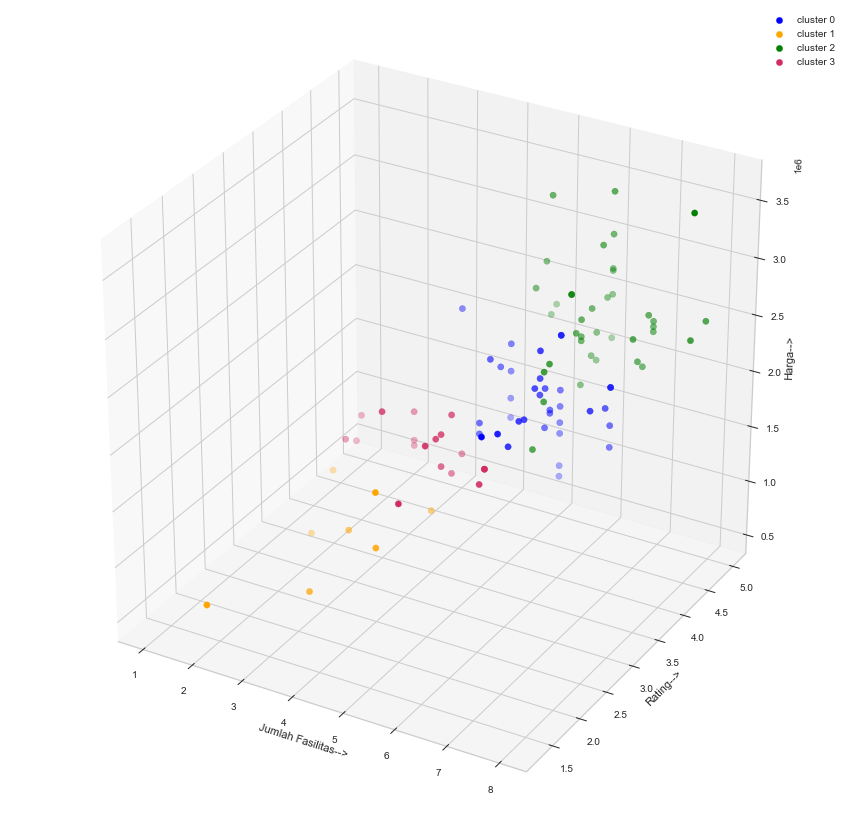

In [70]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y == 0,0],x[y == 0,1],x[y == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y == 1,0],x[y == 1,1],x[y == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y == 2,0],x[y == 2,1],x[y == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y == 3,0],x[y == 3,1],x[y == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.set_xlabel('Jumlah Fasilitas-->')
ax.set_ylabel('Rating-->')
ax.set_zlabel('Harga-->')
ax.legend()
plt.show()

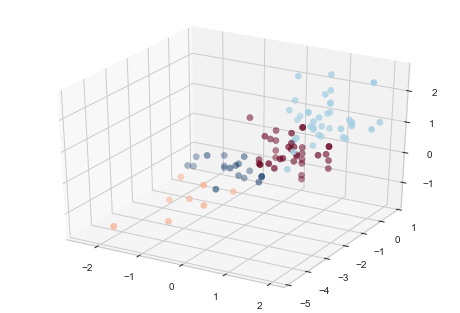

In [71]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(new_df_scaled['Jmlh Fasilitas'])
y = np.array(new_df_scaled['Rating'])
z = np.array(new_df_scaled['Harga'])

ax.scatter(x,y,z, marker="o", c=df_new["cluster_id"], s=40, cmap="RdBu")

plt.show()

In [72]:
values_to_compare = ["Jmlh Fasilitas", "Rating", "Harga"]
description = df_new.groupby('cluster_id')[values_to_compare]
n_kost = description.size()
description = description.mean()
description['n_kost'] = n_kost
pd.options.display.float_format = '{:,.2f}'.format
round(description, 2)

,Jmlh Fasilitas,Rating,Harga,n_kost
cluster_id,,,,
0,4.89,4.72,"1,495,333.33",36
1,3.00,2.69,"900,875.00",8
2,6.21,4.56,"2,497,942.11",38
3,2.61,4.64,"811,500.00",18
